Use any additional libraries you want, but if you don't explicitly code stuff that I have explicitly asked you to code, you will not get marks.

### Q1. Kernel k-means

Let's try and end our course on a happy note. The smiley dataset you see below is made up of many clusters of points. 

In [1]:
import numpy as np
import numpy.linalg as lin
import numpy.random as rnd
from matplotlib import pyplot as plt
from matplotlib import colors


def getFigure( sizex = 7, sizey = 7 ):
    fig = plt.figure( figsize = (sizex, sizey) )
    return fig

def plot2D( X, fig, color = 'r', marker = '+', size = 100, empty = False ):
    plt.figure( fig.number )
    if empty:
        plt.scatter( X[:,0], X[:,1], s = size, facecolors = 'none', edgecolors = color, marker = marker  )
    else:
        plt.scatter( X[:,0], X[:,1], s = size, c = color, marker = marker )


def genCrescentData( d, n, mu, r, flipped = False ):
    X = np.vstack( (np.cos( np.linspace( 0, np.pi, n ) ), np.sin( np.linspace( 0, np.pi, n ) ) ) ).T
    if flipped:
        X[:,1] = -np.abs( X[:,1] )
    else:
        X[:,1] = np.abs( X[:,1] )
    X = (X * r) + mu
    return X

def genSphericalData( d, n, mu, r ):
    X = rnd.normal( 0, 1, (n, d) )
    norms = lin.norm( X, axis = 1 )
    X = X / norms[:, np.newaxis]
    X = (X * r) + mu
    return X

In [2]:
d = 2
n = 200

mu1 = np.array( [0,0] )
mu2 = np.array( [0,1] )
mu3 = np.array( [0,0] )
mu4 = np.array( [-3,5] )
mu5 = np.array( [3,5] )

tmp1 = genCrescentData( d, n, mu1, 1 )
tmp2 = genCrescentData( d, n, mu2, 5, flipped = True )
tmp3 = genSphericalData( d, n, mu3, 10 )
tmp4 = genSphericalData( d, n, mu4, 1 )
tmp5 = genSphericalData( d, n, mu5, 1 )
X = np.vstack( (tmp1, tmp2, tmp3, tmp4, tmp5) )

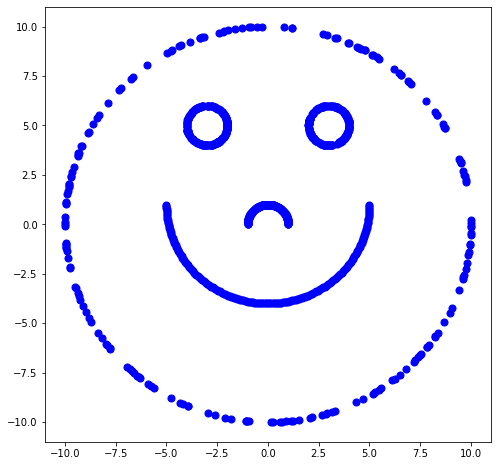

In [3]:
fig = getFigure( 8, 8 )
plot2D( X, fig, size = 50, color = 'b', marker = 'o' )

In [4]:
X

array([[1.        , 0.        ],
       [0.99987539, 0.01578624],
       [0.99950159, 0.03156855],
       ...,
       [2.30561891, 4.28039253],
       [3.95718332, 4.71051755],
       [3.87154738, 4.50968871]])

### Helper Functions

In [6]:
import random
def initialise_means(data,k, init='normal'):
    means=[]
    
    if init=='normal':
        min_max=np.vstack((np.max(X, axis=0),np.min(X, axis=0))) #find the range of values in the array
        dims=data.shape[1]
        ranges=[]
        for dim in range(dims):
            #store the ranges for each dimension
            ranges.append(np.arange(start=min_max[:,dim][1],stop=min_max[:,dim][0],step=10**-2)) 

        for _ in range(k):
            temp=[]
            for r in ranges:
                temp.append(np.random.choice(r)) #randomly select points within the specified range
            means.append(temp) #store it in the list of means
    
    elif init=='++':    
    
        means.append(data[np.random.randint(data.shape[0])]) #pick the first mean randomly from all points

        D=np.zeros(X.shape[0])+10**(5) #initialise distances with a large value
        for _ in range(k-1):
            for i in range(len(data)):
                point=data[i]
                for mean in means:
                    dist=np.sum((point-mean)**2) #find distance of each point from the mean
                    if dist<D[i]: #store the minimum distance
                        D[i]=dist
            #sample a new mean with probability based on the minimum distances obtained above
            arg=np.random.choice(np.arange(len(D)),p=D/sum(D)) 
            new_mean=X[arg]
            means.append(new_mean)
    
    return means

In [7]:
def k_means(data,k,init='normal',print_error=False):

    means=initialise_means(data,k, init=init)
    converged=False
    errors=[]
    while not converged:

        clusters=[[] for i in range(k)]  
        
        for point in data:
                #find the cluster mean closest to the current point and assign the point to that cluster
                assign=np.argmin(np.sum( (np.array(means)-np.array(point))**2 ,axis=1) ) 
                clusters[assign].append(point)
        
        for i in range(k):
            if len(clusters[i])>0:
                #calculate the new cluster mean from all points stored in that cluster
                means[i]=np.mean(clusters[i],axis=0)
         
        error=0
        for i in range(k):
                if len(clusters[i])>0:
                    #calculate loss/error based on distance of points from the mean 
                    error+=np.sum((clusters[i]-means[i])**2)
        errors.append(error)
        
        if len(errors)>10: #check for convergence (no change in error/loss)
            if np.sum(np.array(errors)[-10:]-errors[-1])==0.:
                converged=True
                if print_error:
                    plt.plot(np.arange(len(errors)),errors)
                    plt.xlabel('Iterations')
                    plt.ylabel('Error value')
                return errors[-1],np.array(means),clusters

In [8]:
import matplotlib
def plot_k_means(k,data,init='normal'):
    
    error,means,clusters=k_means(data,k,init=init,print_error=False)

    colors=np.array(list(matplotlib.colors.cnames.items()))[:,0] #get list of colours
    for color in colors:
        if 'light' in color or 'pale' in color or 'white' in color:  #remove light colours for plotting
            colors=np.delete(colors,np.where(colors==color)) 
    final_colors=np.random.choice(colors,size=k,replace=True) #select list of k colours

    plt.figure(figsize=(10,8))
    for i in range(k): #plot all points based on their clusters
        cluster=np.array(clusters[i])
        plt.plot(cluster[:,0],cluster[:,1],'.',color=final_colors[i])
        plt.plot(means[i][0],means[i][1],'o',color=final_colors[i],label=f'cluster {i}')
    plt.title(f'Smiley dataset in {k} clusters')
    plt.show()

### (a) Can you implement the k-means algorithm to cluster this dataset? Visualize your output. [10 points] 

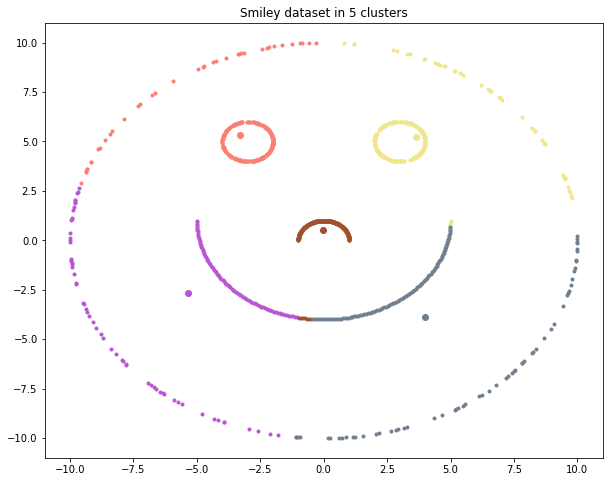

In [12]:
k=5
data=X
plot_k_means(k,data)

Although the algorithm does a decent job of diving the datapoints into clusters, the final clusters are largely non-intuitive. The algorithm is dividing different parts of the vector space fairly equally instead of finding the individual clusters in the dataset. The clusters in the dataset are not of equal size and the algorithm fails to recognise this. This could be because it is a linear clustering algorithm while the clusters in the dataset are non-linear.

### (b) Implement k-means++ to initialize cluster centers usefully. [5 points]

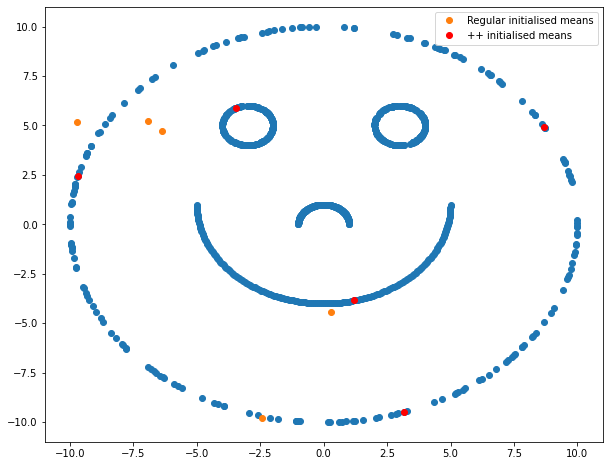

In [19]:
means_reg=initialise_means(data,k, init='normal')
means_plus=initialise_means(data,k, init='++')

plt.figure(figsize=(10,8))
plt.plot(X[:,0],X[:,1],'o')
plt.plot(np.array(means_reg)[:,0],np.array(means_reg)[:,1],'o',label='Regular initialised means')
plt.plot(np.array(means_plus)[:,0],np.array(means_plus)[:,1],'o',label='++ initialised means',color='red')
plt.legend()
plt.show()

As we can see, initialising the means randomly in the 2d space may not give optimal results as the means could be initialised in the same area and it is unlikely that they will be dispersed equi-distant from each other. The k-means ++ initialisation however ensures that the initial means are well dispersed and fairly equidistant from each other. 

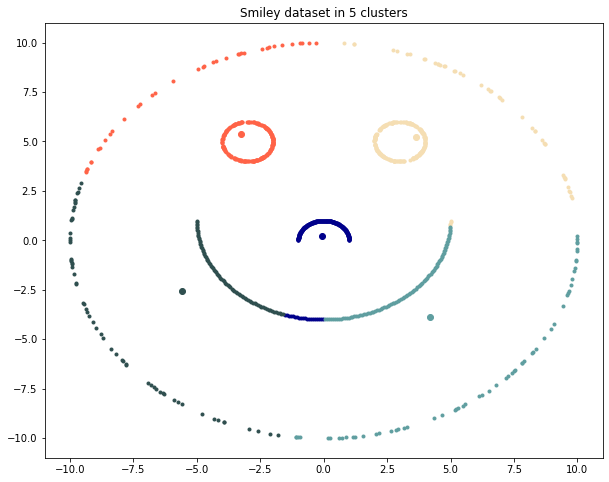

In [23]:
plot_k_means(k,data,init='++')

The k-means ++ algorithm however suffers from the same drawback as vanilla k-means with the final clusters being non-intuitive. The non-linearity in the dataset is not being captured by the initialisation technique.

### (c) What value of k gives you the best clustering? Are you happy with the quality of the clustering? [5 points]

Ideal number of clusters, based on minimum AIC value is 28


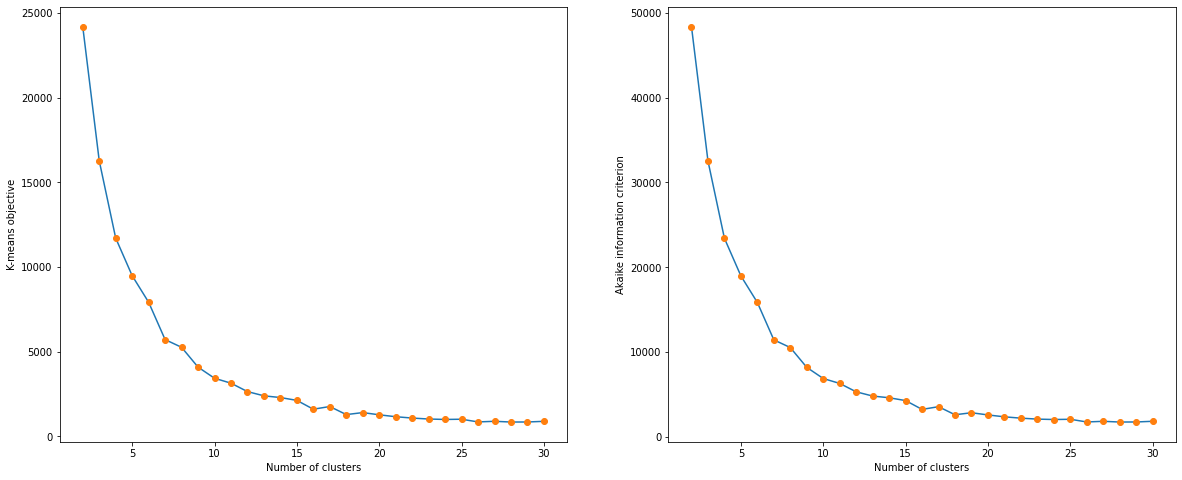

In [35]:
n=30
total_errors=[]
AIC=[] 
for k in range(2,n+1):
    mean_error=0
    #find the mean error over 3 iterations for every value of k
    for _ in range(3):
        error,means,clusters=k_means(data=X,k=k,print_error=False)
        mean_error+=error
    total_errors.append(mean_error/3) 
    AIC.append(2*(mean_error/3)+k*X.shape[1]) #store the akaike information criterion value: 2L + KD
    
fig,axs=plt.subplots(1,2,figsize=(20,8))

axs[0].plot(np.arange(start=2,stop=n+1),total_errors)
axs[0].plot(np.arange(start=2,stop=n+1),total_errors,'o')
axs[0].set_xlabel('Number of clusters')
axs[0].set_ylabel('K-means objective')

axs[1].plot(np.arange(start=2,stop=n+1),AIC)
axs[1].plot(np.arange(start=2,stop=n+1),AIC,'o')
axs[1].set_xlabel('Number of clusters')
axs[1].set_ylabel('Akaike information criterion')

best_k=np.argmin(AIC)+3
print(f'Ideal number of clusters, based on minimum AIC value is {best_k}')

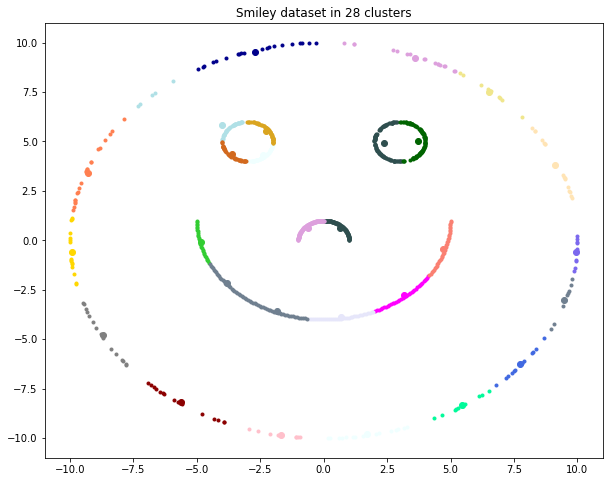

In [36]:
plot_k_means(best_k,data,init='++')

The best value obtained from the akaike information criterion gives us a highly deformed clustering pattern. Looking at the dataset, we can see that there are 5 clusters(2 eyes,nose,mouth,boundary). However, this is not recognised by the algorithm as we saw previously using k=5. Using the value obtained from AIC also does not give us satisfactory clustering. The objective function may not be ideal in the case where we use a linear algorithm for non-linear data.

### (d) I'm going to say that we want to be able to do better than this. So I want you to kernelize your k-means algorithm with a Gaussian kernel. Visualize the clustering output of your kernel k-means algorithm [15 points]

In [68]:
def RBF_kernel(x,z,sigma=3):
    dist=(np.sum(np.square(x-z))) 
    return np.exp(- dist/(2*sigma**2))

In [76]:
def kernelise_data(X):
    #transform the NxD data to a NxN matrix with each point being the kernel value for point ij
    k_mat=np.zeros((X.shape[0],X.shape[0]))
    for i in range(X.shape[0]):
        for j in range(X.shape[0]):
            k_mat[i][j]=RBF_kernel(X[i],X[j])
    return k_mat

In [78]:
def init_kernel_means(data):
    #identical to the k-means++ algorithm
    means=[data[np.random.randint(data.shape[0])]]

    D=np.zeros(data.shape[0])+10**(10)
    for _ in range(k-1):
        for i in range(len(data)):
            point=data[i]
            for mean in means:
                dist=np.sum((point-mean)**2)
                if dist<D[i]:
                    D[i]=dist

        arg=np.random.choice(np.arange(len(D)),p=D/sum(D))
        new_mean=data[arg]
        means.append(new_mean)
    return means

In [88]:
def kernel_kmeans(X,print_error=False):
    k_mat=kernelise_data(X)
    means=init_kernel_means(k_mat)
    errors=[]

    while(1):

            clusters=[[] for i in range(k)]
            assigns=[] #store assignments since new dimensional space is learnt
            for i in range(k_mat.shape[0]):
                    point=k_mat[i]
                    assign=np.argmin(np.sum( (np.array(means)-np.array(point))**2 ,axis=1) )
                    clusters[assign].append(point)
                    assigns.append(assign)

            for i in range(k):
                if len(clusters[i])>0:
                    means[i]=np.mean(clusters[i],axis=0)

            error=0
            for i in range(k):
                    if len(clusters[i])>0:
                        error+=np.sum((clusters[i]-means[i])**2)
            errors.append(error)

            if len(errors)>10:
                if np.sum(np.array(errors)[-10:]-errors[-1])==0.:
                    converged=True
                    break

    #obtain final clusters based on final assignments learnt earlier
    final_clusters=[[] for i in range(k)]
    for i in range(X.shape[0]):
            final_clusters[assigns[i]].append(X[i])
    if print_error:
                    plt.plot(np.arange(len(errors)),errors)
                    plt.xlabel('Iterations')
                    plt.ylabel('Error value')
    return errors[-1],np.array(means),final_clusters

In [111]:
final_errors,means,clusters= kernel_kmeans(X)

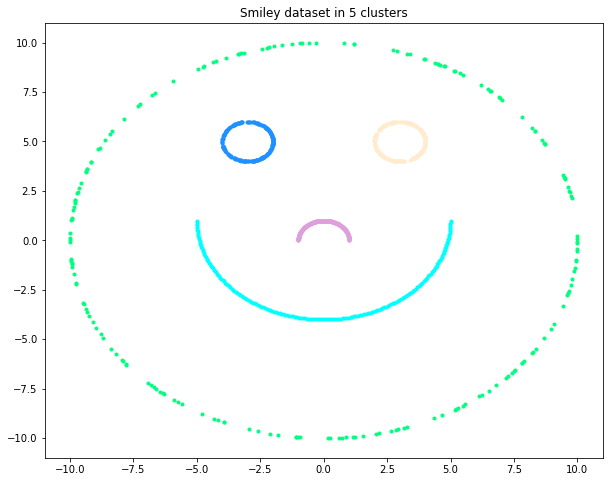

In [112]:
import matplotlib 

colors=np.array(list(matplotlib.colors.cnames.items()))[:,0]
for color in colors:
        if 'light' in color or 'pale' in color or 'white' in color:  #remove light colours for plotting
            colors=np.delete(colors,np.where(colors==color))
final_colors=np.random.choice(colors,size=k,replace=True)

plt.figure(figsize=(10,8))
for i in range(k):
        cluster=np.array(clusters[i])
        plt.plot(cluster[:,0],cluster[:,1],'.',color=final_colors[i])

plt.title(f'Smiley dataset in {k} clusters')
plt.show()

The kernelised version of the algorithm works almost identically to the non-kernelised version, with the main difference in the features of the data. We transform the data into a NxN matrix with each datapoint have N features instead of D features.As we can see the clusters learnt by  the kernelised version are far more intuitive with the features of the face being learnt as separate clusters. Since the data is not linearly separable, a non-linear clustering algorithm is required to get the job done.

### Q2. Expectation-Maximization

We saw how to use EM to learn parameters for Gaussian mixture models last week. Specifically, for a GMM described by the set of parameters $\{\pi_k, \mu_k, \Sigma_k \}_{k=1}^K$, we saw that the E-step boils down to figuring out the expected assignment of clusters based on a responsibility judgment proportional to $\pi_k~N(\mu_k, \Sigma_k)$, given curent parameter estimates, followed by using GDA MLE updates assuming the current expected assignment in the M-step to update parameter values.

(a) Can you derive the E-step and M-step for an EM algorithm that would work for a Gaussian mixture model wherein the mixture weights $\pi_k$ are known, and the covariances are restricted to be spherical, i.e. $\Sigma_k = \sigma^2_k I$? [20 points]

Calculating the probabilitiy of observing $x$ in a space with $K$ gaussian clusters and a latent variable $z$, which denotes assignment to the clusters, we get,  
$p(x|\theta)=p(x,z=k|\theta)=p(z=k|\phi)p(x|z=k,\theta)=\sum_{k=1}^K \pi_k N(x|\mu_k, \Sigma_k) $; where $\phi$ is a categorical distribution indicating the probabilties of cluster assignments and $N(x|\mu_k, \Sigma_k) $ is the gaussian distribution for cluster $k$.    
Therefore, for a Gaussian  mixture model, the proabability of observing $x$ is the weighted sum of $K$ Gaussian distributions,  
$p(x|\theta)=\sum_{k=1}^K \pi_k N(x|\mu_k, \Sigma_k) $.  
Since we are taking the mixture weights $\pi_k$ to be known and the covariances of the Gaussians to be spherical $\Sigma_k = \sigma^2_kI,$, the parameters to be estimated now are $\{\mu_k, \sigma_k \}_{k=1}^K$.     
The likelihood of a set of observations is the product of the individual probabilties, $ L(\mu, \sigma;x_1,x_2....x_n)=argmax_{\mu, \sigma } \Pi_{n=1}^N p(x_n|\mu,\sigma) $  
Taking the log of the above equation we get, $ LL(\mu, \sigma)=argmax_{\mu, \sigma } \sum_{n=1}^N log p(x_n|\mu, \sigma) $  
Substituting, the above equation, we get  $LL(\mu, \sigma_k)=argmax_{\mu, \sigma } \sum_{n=1}^N log (\sum_{k=1}^K N(x_n|\mu_k, \sigma_k^2I)) $, (no dependence on $\pi$).  
Due to the log of the summation in the above equation, we cannot find a closed form solution. 


We can now implement Expectation Maximisation, where we treat the expectation of $z$ as a known value instead of marginalising out the unknown z values. We therefore need to calculate the the conditional posterior distribution on z, $p(Z|X,\theta)$.  
$p(z_n=k|x_n,\theta)\propto p(x_n|z_n=k,\theta)=\sum_{k=1}^K N(x_n|\mu_k, \sigma_k) $ (treating $\pi$ as known)   
The probabilities of a point $x_n$ coming from $k$ distributions is therefore proportional to the euclidian  distances from the mean of the gaussians, similar to the soft k-means algorithm. 
The E-step is,
$E[z_{nk}^t]=\gamma_{nk}^t= \frac {N(x_n|\mu_k^{(t-1)}, \sigma_k^2I^{(t-1)})} {\sum_{l=1}^K N(x_n|\mu_l^{(t-1)}, \sigma_l^2I^{(t-1)}) } $

The maximisation step is dependent on finding the MLE for the parameters $\{\mu_k, \sigma_k \}_{k=1}^K$.  
$\{\hat{\mu},\hat{\sigma}\} = argmax_{\hat{\mu},\hat{\sigma}} \mathbb{E}_{p(Z|X,\hat{\mu},\hat{\sigma})} log [p(X,Z|\hat{\mu},\hat{\sigma})]=\sum_{n=1}^N \mathbb{E}_{p(z_n|x_n,\hat{\mu},\hat{\sigma})} log [p(x_n,z_n|\hat{\mu},\hat{\sigma})]$  
$=argmax_{\hat{\mu},\hat{\sigma}} \mathbb{E}[\prod_{n=1}^N p(x_n,z_n|\hat{\mu},\hat{\sigma})]$  
$=argmax_{\hat{\mu},\hat{\sigma}} \mathbb{E}[\prod_{n=1}^N p(z_n|\phi) p(x_n|z_n,\hat{\mu},\hat{\sigma})]$  
$=argmax_{\hat{\mu},\hat{\sigma}} \mathbb{E}[\prod_{n=1}^N \prod_{k=1}^K p(x_n|z_n=k,\hat{\mu_k},\hat{\sigma_k})]^{z_{nk}}$ (treating $p(z_n|\phi)$ to be known)  
$=argmax_{\hat{\mu},\hat{\sigma}} log\mathbb{E}[\prod_{n=1}^N \prod_{k=1}^K p(x_n|z_n=k,\hat{\mu_k},\hat{\sigma_k})]^{z_{nk}}$  
$=argmax_{\hat{\mu},\hat{\sigma}} \mathbb{E}[\sum_{n=1}^N \sum_{k=1}^K z_{nk} log p(x_n|z_n=k,\hat{\mu_k},\hat{\sigma_k})]$  
$=argmax_{\hat{\mu},\hat{\sigma}} \mathbb{E}[\sum_{n=1}^N \sum_{k=1}^K z_{nk} log N(x_n|\hat{\mu_k},\hat{\sigma_k})]$  
$=argmax_{\hat{\mu},\hat{\sigma}} \sum_{n=1}^N \sum_{k=1}^K \mathbb{E}[z_{nk}] log N(x_n|\hat{\mu_k},\hat{\sigma_k})$

We know that for the normal distribution $\mu_{MLE}= 1/N \sum_{n=1}^N x_n$ and $\sigma_{MLE}^2= 1/N \sum_{n=1}^N (x_n-\mu)^2$  
Looking at each of the k clusters/distributions independently and using the formulas in the above equation, we get the M-step as,  
 $\mu_{k}= 1/N_k \sum_{n=1}^N \mathbb{E}[z_{nk}] x_n$ and $\sigma_{k}^2= 1/N \sum_{n=1}^N \mathbb{E}[z_{nk}] (x_n-\mu)^2$  

(b) Implement this algorithm and show that it works on synthetic data with 3 clusters. If you are unable to derive the EM algorithm for part (a), implement the EM algorithm I showed in the class slides for the standard GMM (5 point penalty for taking this option) [15 points]. 

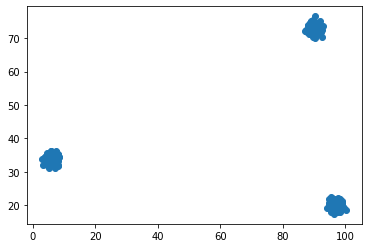

In [724]:
k=3
X=np.zeros((900,2))
size=int(X.shape[0]/k)
for i in range(k):
    X[i*size:(i+1)*size]=np.random.multivariate_normal(mean=np.random.randint(100,size=2),cov=I, size=size)
plt.plot(X[:,0],X[:,1],'o')
plt.show()

The synthetic data is generated from 3 gaussian distributions with randomly generated means and a constant variance.

In [737]:
from scipy.stats import multivariate_normal

#initialisation
means=X[np.random.randint(X.shape[0],size=k)] #select initial means randomly
covs=np.array([[[1.,0.],[0.,1.]]]*k) #initial covariances
I=np.array([[1.,0.],[0.,1.]]) #identity matrix
Z=np.zeros((X.shape[0],k)) #cluster assignments/responsibilities
#pi=np.array([1.]*k)
pi=np.array([1./k]*k) #using a constant value for pi=1/k
N=np.array([X.shape[0]/k]*k)

x_bar=np.mean(X,axis=0)
sigma=np.std(X,axis=0)

for j in range(k):
    covs[j]=(sigma/k)*I #set initial covariances based on total mean and variance

In [738]:
total_means=[]
converged=False
N_vals=[]
while(1):
    #responsibilities
    gauss=[]
    for i in range(k):
        gauss.append(multivariate_normal(mean=means[i], cov=covs[i])) #gaussian distributions

    for i in range(X.shape[0]): 
        dist=[]
        for j in range(k):
            var = gauss[j]
            dist.append(pi[j]*var.pdf(X[i]))  #calculate probabilities for all point and weight by p values
        Z[i]=dist/np.sum(dist)

    #new means
    for j in range(k):
        temp=np.array([0.,0.])
        for i in range(X.shape[0]):
            temp+=(Z[i][j]*X[i]) /N[j] #weight the means by the ij probabilties
        means[j]=temp
    total_means.append(means)
    

    #new covs
    for j in range(k):
        temp=np.array([0.,0.])
        for i in range(X.shape[0]):
            temp+=(Z[i][j]*(X[i]-means[j])**2)/N[j]  #weight the variances by the ij probabilties
        if np.mean(temp)>0.5:
            covs[j]=np.mean(temp)*I #using spherical variance 
            
    #new N
    N=np.sum(Z,axis=0) #approximated number of values per cluster
    N_vals.append(N) 
    
    if len(N_vals)>10: #check for convergence (no change in error/loss)
            if np.sum(np.array(N_vals)[-10:]-N_vals[-1])==0.:
                converged=True
                break
    
    '''   
    #new pi
    pi=N/Z.shape[0] '''  #approximting the pi values N_k/N

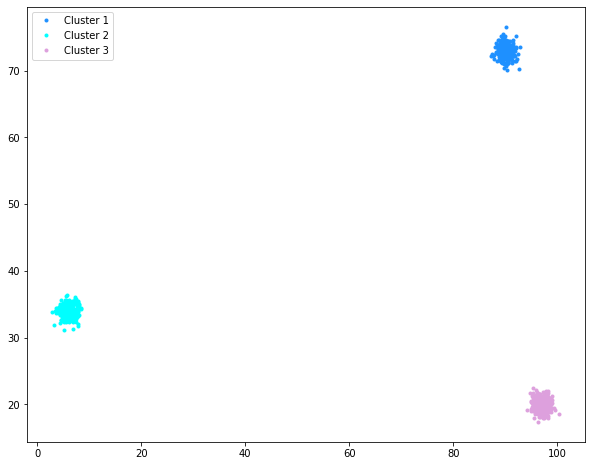

In [739]:
assigns=np.argmax(Z,axis=1)
final_clusters=[[] for i in range(k)]
for i in range(X.shape[0]):
    final_clusters[assigns[i]].append(X[i])
    
plt.figure(figsize=(10,8))
for i in range(k):
        cluster=np.array(final_clusters[i])
        plt.plot(cluster[:,0],cluster[:,1],'.',color=final_colors[i],label=f'Cluster {i+1}')
plt.legend()
plt.show()

As we can see, the clusters are well approximated by the model. 

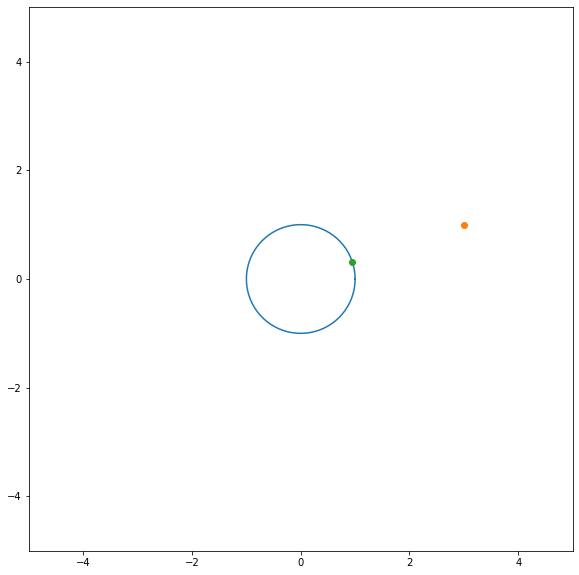

In [106]:
import numpy as np
import matplotlib.pyplot as plt
 
theta = np.linspace( 0 , 2 * np.pi , 150 )
 
radius = 1
 
a = radius * np.cos( theta )
b = radius * np.sin( theta )
 
figure, axes = plt.subplots( 1 ,figsize=(10,10))
 
axes.plot( a, b )
axes.set_aspect( 1 )
axes.set_xlim(-5,5)
axes.set_ylim(-5,5)


point=np.array([3,1])
x=point[0]
y=point[1]
    
plt.plot(x,y,'o')

if sum(point)>1:
    point=point/np.sqrt(sum(point**2))
    
x=point[0]
y=point[1]
    
plt.plot(x,y,'o')
plt.show()